In [114]:
# Train the Decision Tree

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)


DecisionTreeClassifier(max_depth=2)

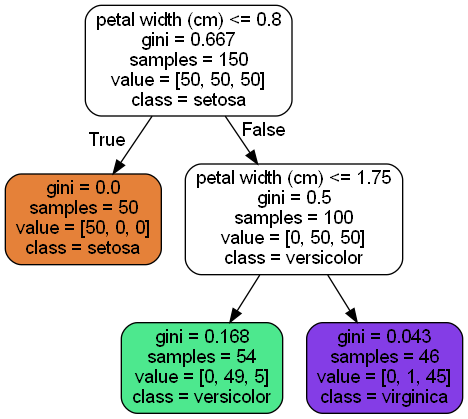

In [96]:
# Visualizing the Tree
import pydot
from IPython.display import Image
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

(graph,) = pydot.graph_from_dot_file(filename_dot)
graph.write_png(filename_png)

Image(filename_png)

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

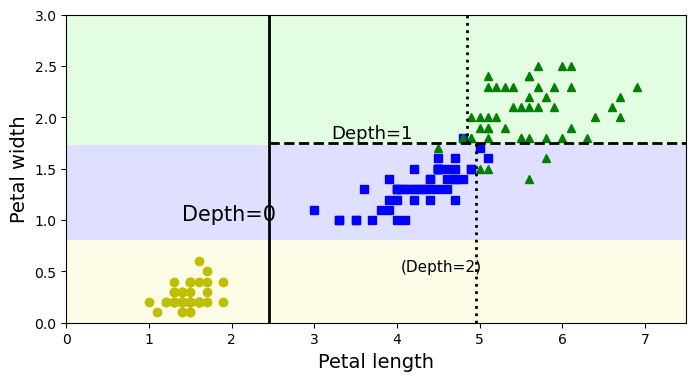

In [98]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.savefig("decision_tree_decision_boundaries_plot")
plt.show()

# Making Predictions

### Decision Trees don’t require feature scaling or centering at all

* The **samples** attribute counts how many training instances it applies to.
* The **value** attribute tells you how many training instances of each _class this node applies to.
* The **gini** attribute 
measures its impurity: a node is “pure” (gini=0) if all training instances i 
applies to belong to the same class
   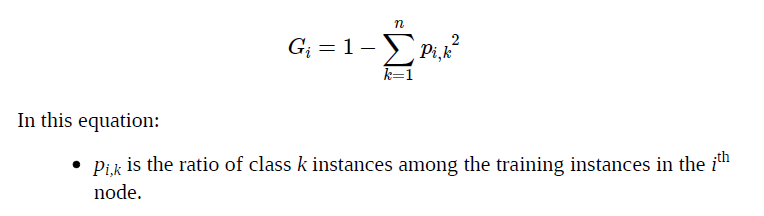 


### CART algorithm, which produces only binary trees: nonleaf nodes always have two children
### ID3 can produce Decision Trees with nodes that have more than two children

# Estimating Class Probabilities

In [99]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [100]:
tree_clf.predict([[5, 1.5]])

array([1])

# The CART (Classification and Regression Tree) Training Algorithm

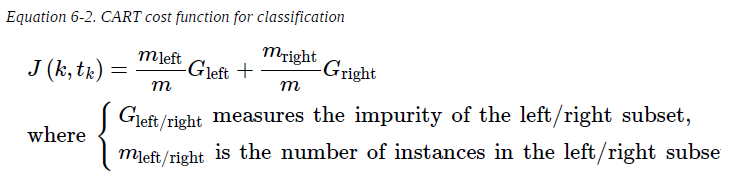

As you can see, the CART algorithm is a greedy algorithm: A
greedy algorithm often produces a solution that’s reasonably good but not guaranteed to be
optimal.

# Computational Complexity

### O(n × m log (m))

# Gini Impurity or Entropy?

Machine Learning, entropy is frequently used as an impurity measure: a set’s
entropy is zero when it contains instances of only one class

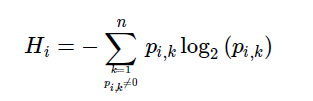

* Gini impurity is 
slightly faster to compute, so it is a good default
* Gini impurity tends to isolate the most frequent class in its own branch of the 
tree, while entropy tends to produce slightly more balanced tree

criterion = "entropy"

# Regularization Hyperparameters

To avoid overfitting the training data, you need to restrict the Decision Tree’s
freedom during training. As you know by now, this is called regularization

* **min_samples_split** (the minimum number of samples a node must have before it can be split)
* **min_samples_leaf** (the minimum number of samples a leaf node must have)
* **min_weight_fraction_leaf** (same as min_samples_leaf but expressed as a fraction of the total number of weighted instaces),
* **max_leaf_nodes** (the maximum number of leaf nodes,)
* **max_features** (the maximum number of features that are evaluated for splitting at each node),

# Regression

In [101]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=3, min_samples_leaf=10)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=10)

In [102]:
#Visualizing 
from IPython.display import Image
def visualize_tree(tree, filename_dot, filename_png):
    export_graphviz(
        tree,
        out_file=filename_dot,
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )
    (graph,) = pydot.graph_from_dot_file(filename_dot)
    graph.write_png(filename_png)
    

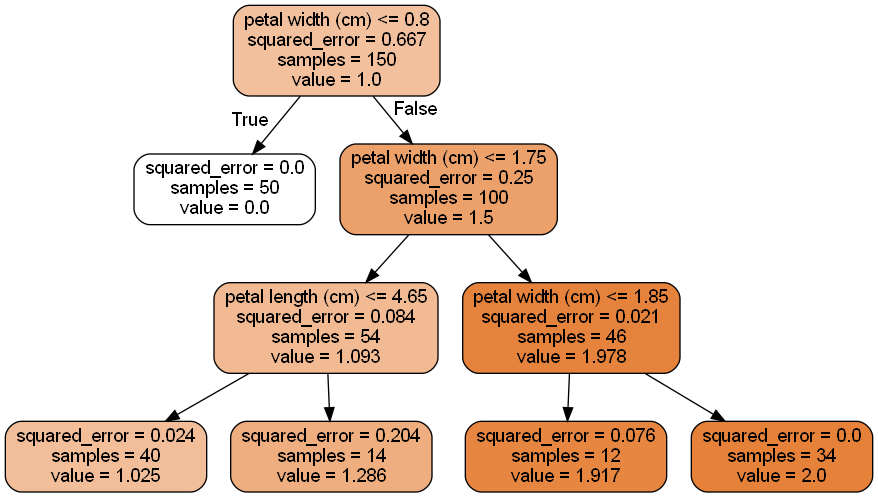

In [103]:
visualize_tree(tree_reg, "tree_reg.dot", "tree_reg.png")
Image("tree_reg.png")

# Instability

* More generally, the main issue with Decision Trees is that they are very sensitive 
to small variations in the training data
* Decision Trees love orthogonal decision boundaries (all splits are 
perpendicular to an axis), which makes them sensitive to training set rotation

# Exercises

## 1) What is the approximate depth of a Decision Tree trained (without restrictions) on a training set with one million instances?

Глибина добре збалансованого бінарного дерева, що містить m листів, дорівнює log2(m), округлена в більшу сторону. Двійкове дерево рішень буде відносно збалансованим наприкінці навчання, і матиме один листок на кожен вузол, якщо воно навчено без обмежень. Таким чином, якщо навчальний набір містить один мільйон екземплярів, дерево рішень матиме глибину **log2(1 000 000) ≈ 20**. Зважаючи на те, що дерево не буде ідеально збаланстованим, глибина може бути трохи більшою.

## 2) Is a node’s Gini impurity generally lower or greater than its parent’s? Is it generally lower/greater, or always lower/greater?

Домішка Джіні вузла зазвичай **нижча**, ніж у батьківського. Це забезпечується функцією витрат навчального алгоритму CART, яка розділяє кожен вузол таким чином, щоб мінімізувати зважену суму домішок Джіні його дочірніх елементів.

## 3) If a Decision Tree is overfitting the training set, is it a good idea to try decreasing max_depth?

Гарна ідея **зменшити max_depth**, оскільки це обмежить модель, регуляризувавши її.

## 4) If a Decision Tree is underfitting the training set, is it a good idea to try scaling the input features?

Деревам рішень байдуже, масштабовані чи центровані навчальні дані, тому масштабування вхідних даних не буде впливати на результат.

## 5) If it takes one hour to train a Decision Tree on a training set containing 1 million instances, roughly how much time will it take to train another Decision Tree on a training set containing 10 million instances?

Обчислювальна складність навчання дерева рішень становить O(n × m log(m)). Отже, якщо помножити розмір тренувального набору на 10, час тренування буде помножено на K = (n × **10**m × log(**10**m)) / (n × m × log(m)) = 10 × log(10m)/log(m). Якщо m = 1 000 000, то K ≈ 11,7, тому можна очікувати, що час навчання становитиме приблизно **11,7** годин

## 6) If your training set contains 100,000 instances, will setting presort=True speed up training?

Попереднє сортування навчального набору прискорює навчання, лише якщо набір даних менше кількох тисяч екземплярів. Якщо він містить 100 000 екземплярів, встановлення presort=True значно сповільнить навчання.

## 7) Train and fine-tune a Decision Tree for the moons dataset by following these steps:

a)  Generate a moons dataset using ```make_moons(n_samples=10000, noise=0.4)```.

In [104]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

b) Split it into a training set and a test set using ```train_test_split()```.

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c) Use grid search with cross-validation (with the help of the ```GridSearchCV``` class) to find good hyperparameter values for a ```DecisionTreeClassifier```. Hint: try various values for ```max_leaf_nodes```.

In [106]:
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [107]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=17, random_state=42)

d) Train it on the full training set using these hyperparameters, and measure your model's performance on the test set. You should get roughly 85% to 87% accuracy.

In [108]:
# By default, GridSearchCV trains the best model found on the whole training set, 
# so we don't need to do it again. We can simply evaluate the model's accuracy:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8695

## 8) Grow a forest

a) Continuing the previous exercise, generate 1,000 subsets of the training set, each containing 100 instances selected randomly. Hint: you can use Scikit-Learn's ```ShuffleSplit``` class for this.

In [109]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

b) Train one Decision Tree on each subset, using the best hyperparameter values found above. Evaluate these 1,000 Decision Trees on the test set. Since they were trained on smaller sets, these Decision Trees will likely perform worse than the first Decision Tree, achieving only about 80% accuracy.

In [110]:
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.805471

c) Now comes the magic. For each test set instance, generate the predictions of the 1,000 Decision Trees, and keep only the most frequent prediction (you can use SciPy's ```mode()``` function for this). This gives you majority-vote predictions over the test set.

In [111]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [112]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

d) Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1.5% higher). Congratulations, you have trained a Random Forest classifier!

In [113]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.872